# Notes: application CHO Perfusion cspr openloop

Here we run CHO Perfusion with cspr openloop for change of perfusion rate.

In [1]:
run -i BPL_CHO_perfusion_cspr_openloop_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

In [3]:
describe('culture'); print(); describe('broth')

Reactor culture CHO-MAb - cell line HB-58 American Culture Collection ATCC

Reactor broth substances included in the model

Cells viable index =  1 molecular weight =  24.6 Da
Cells dead   index =  2 molecular weight =  24.6 Da
Glucose      index =  3 molecular weight =  180.0 Da
Glutamine    index =  4 molecular weight =  146.1 Da
Lactate      index =  5 molecular weight =  90.1 Da
Ammonia      index =  6 molecular weight =  17.0 Da
Protein      index =  7 molecular weight =  150000.0 Da


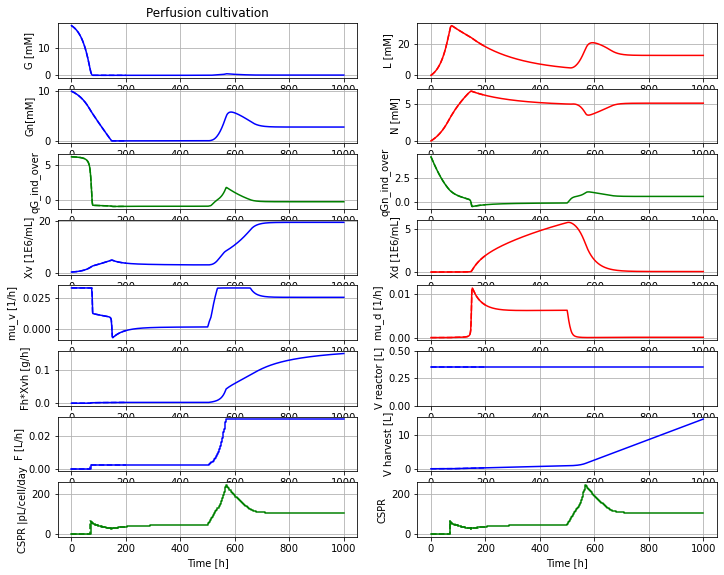

In [4]:
newplot('Perfusion cultivation', plotType='Extended')

par(samplePeriod=1); par(F1=0.0020)                # General parameters 
par(mu_ref=0.04); simu()                           # First simulation (solid)       
par(mu_ref=1); simu(200)                              # Second simulation (dashed)    

In [5]:
model.get('CSPR')

array([37.68370282])

We see here the shorter settling time for cell conc Xv when the slower exponential increase of perfusion rate is used, compared to an abrupt change.

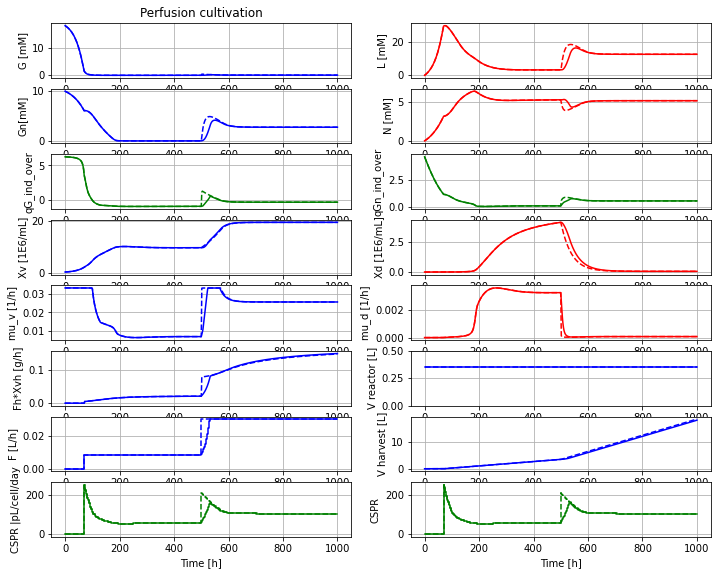

In [6]:
newplot('Perfusion cultivation', plotType='Extended')

par(samplePeriod=1); par(F1=0.0080)                # General parameters 
par(mu_ref=0.04); simu()                           # First simulation (solid)       
par(mu_ref=1); simu()                              # Second simulation (dashed)  

We see that a somewhat smaller change in perfusion rate make the differnce in settling time of Xv for the two strategies to almost disappear.

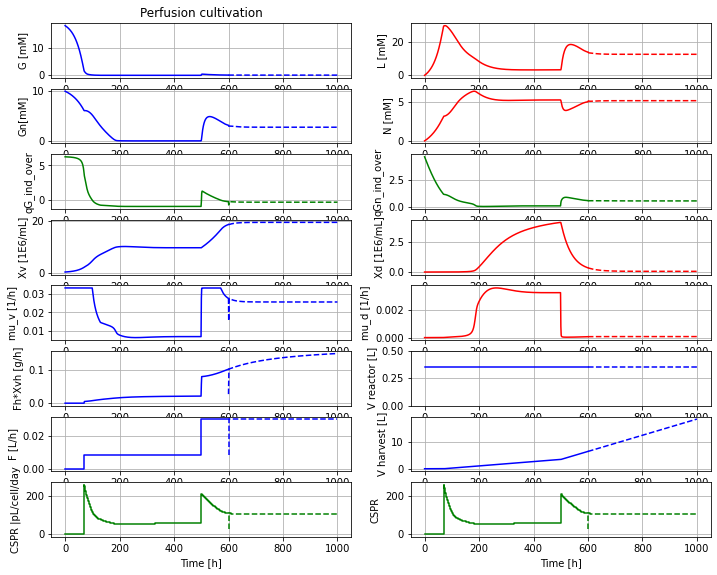

In [7]:
newplot('Perfusion cultivation', plotType='Extended')
simu(600)
simu(400,'cont')

In [8]:
describe('feedtank.W')

Reactor broth weight : 81.928 [ kg ]


In [9]:
describe('feedtank.V')

Feed volume : 81.577 [ L ]


In [10]:
81.928/81.577

1.004302683354377

In [11]:
describe('bioreactor.broth_decay.k_decay')

Rate of decay of viable cells : 0.0 [ 1E9 cells/(L*h) ]


In [12]:
describe('k_lysis')

Specific rate of lysis of dead cells : 0.0 [ 1/h ]


In [13]:
disp('culture')

qG_max1 : 0.297
qG_max2 : 0.038
qGn_max1 : 0.124
qGn_max2 : 0.022
mu_d_max : 0.13


In [14]:
describe('mu')

Specific cell growth rate variable : 0.026 [ 1/h ]


In [15]:
describe('parts')

['bioreactor', 'bioreactor.broth_decay', 'bioreactor.culture', 'CSPR', 'cspr_openloop', 'D', 'feedtank', 'filter', 'harvesttank', 'liquidphase', 'MSL']


In [16]:
describe('MSL')

MSL: 3.2.2 build 3 - used components: RealInput, RealOutput


In [17]:
system_info()


System information
 -OS: Windows
 -Python: 3.9.5
 -Scipy: not installed in the notebook
 -PyFMI: 2.9.5
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_CHO.Perfusion_cspr_openloop
 -Generated: 2022-10-10T10:03:56
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0
 -Interaction: FMU-explore ver 0.9.5


In [18]:
model.get('Customer.name')

['Bioprocess Library']